<a href="https://colab.research.google.com/github/CarolineOlive/Projetos-Bootcamp/blob/master/Caroline_Oliveira_Projeto_M%C3%B3dulo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 2 - Cobertura Vacinal 
Dados fonte: TABNET - DATASUS 

**Bootcamp Data Science 2021 - Alura**



---


Autora: Caroline Silva de Oliveira

E-mail: karolsilvaoliveira@yahoo.com.br

LinkedIn:  www.linkedin.com/in/caroline-oliveira-quim






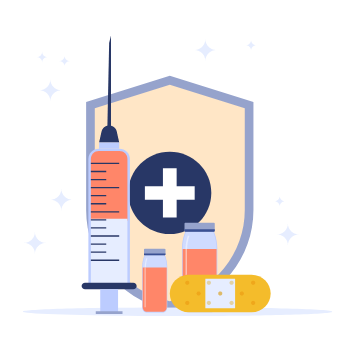

## Contextualiazação
O termo **cobertura vacinal** refere-se ao percentual da população que está vacinada. Quanto mais pessoas receberem determinada vacina, maior será a cobertura vacinal. 

O Brasil é um país que tem um Programa Nacional de Imunizações (PNI) reconhecido internacionalmente. No entanto, vive um contexto de queda no percentual de cobertura vacinal ao longo dos anos, ou seja, aumenta a parcela da população sem vacinação adequada [1]. A meta de cobertura vacinal determinada pela OMS é de 95% e é preocupante e tem chamado a atenção das autorizadades de saúde [2]

## Sobre os dados utilizados

**Coberturas vacinais por Imuno e Ano - 2000-2019**

Imuno: BCG, Hepatite B, Poliomielite, Febre Amarela, Hepatite A, Tríplice Viral D1
* Fonte: TABNET-DATASUS - Ministério da Saúde
* Disponível em: <http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def> Acesso em: 09/02/2021

**Coberturas vacinais por Unidade da Federação e Ano - 2014-2019**

Imuno: Hepatite A
* Fonte: TABNET-DATASUS - Ministério da Saúde
* Disponível em: <http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def> Acesso em: 09/02/2021

**Número de casos por Unidade da Federação e Ano**

Imuno: Hepatite A

* Fonte: Indicadores e Dados Básicos das Hepatites nos Municípios Brasileiros
* Disponível em: <http://indicadoreshepatites.aids.gov.br/> Acesso em: 10/02/2021

A base de dados do governo dispõe de informações sobre o número de casos de hepatite A e a taxa de incidência num período de 1999 a 2019. Os dados são disponibilizados separadamente por UF, sendo assim, foi necessário fazer uma compilação dos dados em um único banco de dados.

In [57]:
import pandas as pd

#importanto bibliotecas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

##**Coberturas Vacinais - Imunos**

**Imuno:** BCG, Hepatite B, Poliomielite, Febre Amarela, Hepatite A, Tríplice Viral D1

**Período:** 2000-2019




In [58]:
# Importando o banco de dados de cobertura vacinal por ano segundo Imunos selecionados
dados_vacina_imuno = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Science/Módulo 2/Projeto 2/A130647189_28_143_208_CV_IMUNOS_BR.csv', encoding="ISO-8859-1", na_values='-',
                    skiprows = 4, skipfooter=20, sep=";", thousands=".", decimal=",", engine='python')
dados_vacina_imuno.head()

,Imuno,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,072 BCG,111.74,112.60,110.28,108.47,113.36,114.48,113.06,111.08,108.91,108.71,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.12,97.72,52.95,104.96
1,073 Hepatite B,91.08,91.88,91.47,92.00,96.26,98.46,100.30,99.89,96.06,100.20,96.08,97.71,96.67,100.56,96.42,97.74,105.19,86.29,92.91,55.93,94.10
2,074 Poliomielite,101.44,102.83,100.01,100.48,104.30,105.12,105.25,105.43,100.18,103.66,99.35,101.33,96.55,100.71,96.76,98.29,84.43,84.27,88.17,51.54,96.61
3,006 Febre Amarela,37.14,40.24,38.70,34.68,38.29,42.95,46.17,49.23,47.09,49.69,49.25,48.95,49.31,51.50,46.86,46.31,44.59,46.46,58.40,39.91,45.06
4,096 Hepatite A,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,60.13,97.07,71.58,83.05,82.16,52.09,63.73


In [59]:
dados_vacina_imuno.tail()

,Imuno,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
1,073 Hepatite B,91.08,91.88,91.47,92.00,96.26,98.46,100.30,99.89,96.06,100.20,96.08,97.71,96.67,100.56,96.42,97.74,105.19,86.29,92.91,55.93,94.10
2,074 Poliomielite,101.44,102.83,100.01,100.48,104.30,105.12,105.25,105.43,100.18,103.66,99.35,101.33,96.55,100.71,96.76,98.29,84.43,84.27,88.17,51.54,96.61
3,006 Febre Amarela,37.14,40.24,38.70,34.68,38.29,42.95,46.17,49.23,47.09,49.69,49.25,48.95,49.31,51.50,46.86,46.31,44.59,46.46,58.40,39.91,45.06
4,096 Hepatite A,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,60.13,97.07,71.58,83.05,82.16,52.09,63.73
5,021 Tríplice Viral D1,77.50,88.43,96.92,112.95,110.93,106.55,105.35,106.80,99.81,103.74,99.93,102.39,99.50,107.46,112.80,96.07,95.41,90.85,91.89,57.19,97.99


In [60]:
#Transformando a coluna 'Imuno' em indice
dados_vacina_imuno = dados_vacina_imuno.set_index("Imuno")
dados_vacina_imuno.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Imuno,,,,,,,,,,,,,,,,,,,,,
072 BCG,111.74,112.60,110.28,108.47,113.36,114.48,113.06,111.08,108.91,108.71,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.12,97.72,52.95,104.96
073 Hepatite B,91.08,91.88,91.47,92.00,96.26,98.46,100.30,99.89,96.06,100.20,96.08,97.71,96.67,100.56,96.42,97.74,105.19,86.29,92.91,55.93,94.10
074 Poliomielite,101.44,102.83,100.01,100.48,104.30,105.12,105.25,105.43,100.18,103.66,99.35,101.33,96.55,100.71,96.76,98.29,84.43,84.27,88.17,51.54,96.61
006 Febre Amarela,37.14,40.24,38.70,34.68,38.29,42.95,46.17,49.23,47.09,49.69,49.25,48.95,49.31,51.50,46.86,46.31,44.59,46.46,58.40,39.91,45.06
096 Hepatite A,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,60.13,97.07,71.58,83.05,82.16,52.09,63.73


A fim de garantir a correta comparação entre os imunos, optei por selecionar os dados de 2014 a 2019, anos que comtemplam dados de todos os imunos selecionados.

In [61]:
#Selecionando apenas os dados de 2014 a 2019
dados_vacina_imuno_selc = dados_vacina_imuno[["2014", "2015", "2016", "2017", "2018", "2019"]]
dados_vacina_imuno_selc.head()

,2014,2015,2016,2017,2018,2019
Imuno,,,,,,
072 BCG,107.28,105.08,95.55,97.12,97.72,52.95
073 Hepatite B,96.42,97.74,105.19,86.29,92.91,55.93
074 Poliomielite,96.76,98.29,84.43,84.27,88.17,51.54
006 Febre Amarela,46.86,46.31,44.59,46.46,58.40,39.91
096 Hepatite A,60.13,97.07,71.58,83.05,82.16,52.09


In [62]:
#alterar a forma de mostrar os dados (2 casa após a vírgula)
pd.options.display.float_format = "{:.2f}".format

### Cobertura Vacinal total

In [63]:
#Criando uma nova coluna 'Total'
dados_vacina_imuno_selc["Total"] = dados_vacina_imuno_selc[["2014", "2015", "2016", "2017", "2018", "2019"]].mean(1)
dados_vacina_imuno_selc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2014,2015,2016,2017,2018,2019,Total
Imuno,,,,,,,
072 BCG,107.28,105.08,95.55,97.12,97.72,52.95,92.62
073 Hepatite B,96.42,97.74,105.19,86.29,92.91,55.93,89.08
074 Poliomielite,96.76,98.29,84.43,84.27,88.17,51.54,83.91
006 Febre Amarela,46.86,46.31,44.59,46.46,58.40,39.91,47.09
096 Hepatite A,60.13,97.07,71.58,83.05,82.16,52.09,74.35


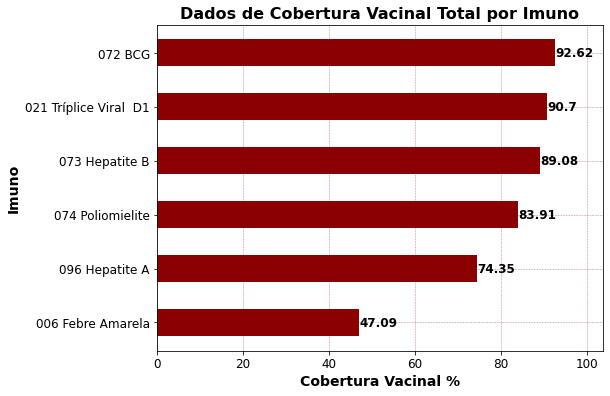

In [64]:
#ordenando os dados pelo total
dados_vacina_imuno_selc = dados_vacina_imuno_selc.sort_values('Total', ascending = True)

#criando a vizualização dos dados totais de cobertura vacinal dos imunos selecionados
plt.figure(figsize=(8,6))
ax = plt.barh(dados_vacina_imuno_selc.index, dados_vacina_imuno_selc["Total"], height = 0.5, color = "darkred")

plt.title("Dados de Cobertura Vacinal Total por Imuno", fontsize = 16, fontweight = "bold") #título
plt.xlabel("Cobertura Vacinal %",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Imuno",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='maroon', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.xlim(0,dados_vacina_imuno_selc["Total"].max()*1.12) #aumentando o limite do eixo x para caber o valor de cada barra sem sobrepor o eixo

#rotina para adicionar o número em frente cada barra
for index, value in enumerate(dados_vacina_imuno_selc["Total"].round(2)):
  plt.text(value, index, str(value), color='black', fontweight="bold", fontsize=12, verticalalignment='center')

plt.show()

#### Observações:
O gráfico mostra que de forma geral, todos os imunos apresentam cobertura vacinal abaixo de 95%, taxa recomendada pelo OMS. Hepatite A e Febre amarela são os imunos com menor taxa de cobertura vacinal, acendendo um alerta sobre possíveis problemas que vão desde a falta de acesso a vacina à falta de disponibilidade da mesma.

####Manipulação dos dados

In [65]:
#removendo os números contidos antes dos nomes dos imunos no indice
dados_vacina_imuno_selc.index = dados_vacina_imuno_selc.index.str[3:]
dados_vacina_imuno_selc

,2014,2015,2016,2017,2018,2019,Total
Imuno,,,,,,,
Febre Amarela,46.86,46.31,44.59,46.46,58.40,39.91,47.09
Hepatite A,60.13,97.07,71.58,83.05,82.16,52.09,74.35
Poliomielite,96.76,98.29,84.43,84.27,88.17,51.54,83.91
Hepatite B,96.42,97.74,105.19,86.29,92.91,55.93,89.08
Tríplice Viral D1,112.80,96.07,95.41,90.85,91.89,57.19,90.70
BCG,107.28,105.08,95.55,97.12,97.72,52.95,92.62


In [66]:
# verificando o indice usando a função .index pegando o primeiro valor do indice
dados_vacina_imuno_selc.index[0]  

' Febre Amarela'

In [67]:
#removendo o espaço que há antes do nome
dados_vacina_imuno_selc.index = dados_vacina_imuno_selc.index.str.strip()
dados_vacina_imuno_selc

,2014,2015,2016,2017,2018,2019,Total
Imuno,,,,,,,
Febre Amarela,46.86,46.31,44.59,46.46,58.40,39.91,47.09
Hepatite A,60.13,97.07,71.58,83.05,82.16,52.09,74.35
Poliomielite,96.76,98.29,84.43,84.27,88.17,51.54,83.91
Hepatite B,96.42,97.74,105.19,86.29,92.91,55.93,89.08
Tríplice Viral D1,112.80,96.07,95.41,90.85,91.89,57.19,90.70
BCG,107.28,105.08,95.55,97.12,97.72,52.95,92.62


### Cobeturas Vacinais por Ano

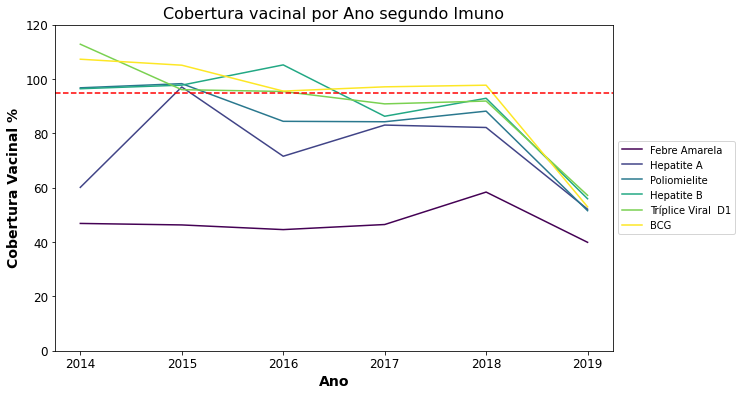

In [68]:
ax = dados_vacina_imuno_selc[["2014", "2015", "2016", "2017", "2018", "2019"]].T.plot(figsize=(10,6), colormap = 'viridis', )

plt.title("Cobertura vacinal por Ano segundo Imuno", fontsize = 16) #Título figura
plt.xlabel("Ano",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Cobertura Vacinal %",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.ylim(0,120)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.axhline(95, linestyle="--", color='red')


plt.show()

#### Observações
Observa-se que os imunos BCG, TRIPLICE VIRAL, HEPATITE B e POLIOMELITE apresentam perfis de cobertura vacinal (CV) acima de 95%, como recomendado pela OMS, até 2015. 
Após esse período, observa-se uma queda na CV da maioria dos imunos, mantendo apenas BCG dentro da faixa.
 
* Febre amarela aprensenta a menor combertura vacinal (CV) dentre os imunos selecionados, apresentando um pequeno aumento com o passar dos anos, no entanto sem atingir valores muito maiores que o inicial.
* Hepatite A, teve sua campanha de  imunização inciada em 2014, o que justifica o grande aumento da CV em 2015. No entanto, a taxa caiu consideravelmente nos anos seguintes, mantendo valores bem abaixo da meta.




##Imuno: Hepatite A

A vacinação contra hepatite A iniciou-se em 2014, como uma das ações do Ministério da Saúde contra Hepatites Virais. Neste ano, a cobertura vacinal foi de 60,13 [3].


A hepatite A pode ser transmitida por contato direto entre as pessoas, pela água ou por alimentos contaminados, por mãos mal lavadas ou sujas de fezes e por objetos que contenham a presença do vírus [1].

O crescente aumento do número de casos tem sido amplamente discutido e preocupado os orgãos de saúde [4, 5].

Por ser uma vacina relativamente nova e haver uma discussão a respeito do aumento do número de casos, escolhi explorar um pouco mais os dados desse imuno.



###Cobertura Vacinal

In [69]:
# Importando o banco de dados de cobertura vacinal por ano segundo Unidade da Federação - imuno Hepatite A
dados_vacina_hep_A = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Science/Módulo 2/Projeto 2/A160201189_28_143_208_HEPA_CV_UF.csv', encoding="ISO-8859-1", na_values='-',
                    skiprows = 4, skipfooter=20, sep=";", thousands=".", decimal=",", engine='python')
dados_vacina_hep_A.head()

,Unidade da Federação,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,67.33,116.26,84.04,87.45,82.45,52.60,81.68
1,12 Acre,11.52,73.22,60.42,69.47,76.11,48.41,56.49
2,13 Amazonas,44.12,97.74,68.07,79.94,78.19,56.47,70.85
3,14 Roraima,52.93,98.21,72.93,90.29,90.46,52.67,76.10
4,15 Pará,24.11,73.83,55.85,67.50,66.50,41.59,54.99


In [70]:
#Transformando a coluna 'Unidade da Federação' em indice
dados_vacina_hep_A = dados_vacina_hep_A.set_index("Unidade da Federação")
dados_vacina_hep_A.head()

,2014,2015,2016,2017,2018,2019,Total
Unidade da Federação,,,,,,,
11 Rondônia,67.33,116.26,84.04,87.45,82.45,52.60,81.68
12 Acre,11.52,73.22,60.42,69.47,76.11,48.41,56.49
13 Amazonas,44.12,97.74,68.07,79.94,78.19,56.47,70.85
14 Roraima,52.93,98.21,72.93,90.29,90.46,52.67,76.10
15 Pará,24.11,73.83,55.85,67.50,66.50,41.59,54.99


In [71]:
# Criando uma nova coluna para associar uma região a cada estado.
# A partir do indice, foi selecionado apenas o primeiro número para usar como referência para as regiões
dados_vacina_hep_A["Região"] = dados_vacina_hep_A.index.str[0]

# criando um dicionário que associa a chave 'index'(estados) às correspondentes regiões. 
regiao_estado = {1:"Norte", 2:"Nordeste", 3:"Sudeste", 4:"Sul", 5:"Centro-Oeste"}

# criando uma função que associa o estado (key) à região (value) e cria a nova coluna.
dados_vacina_hep_A["Região"] = dados_vacina_hep_A["Região"].map(lambda x: regiao_estado[int(x)])

dados_vacina_hep_A["Região"]

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

In [72]:
dados_vacina_hep_A.head()

,2014,2015,2016,2017,2018,2019,Total,Região
Unidade da Federação,,,,,,,,
11 Rondônia,67.33,116.26,84.04,87.45,82.45,52.60,81.68,Norte
12 Acre,11.52,73.22,60.42,69.47,76.11,48.41,56.49,Norte
13 Amazonas,44.12,97.74,68.07,79.94,78.19,56.47,70.85,Norte
14 Roraima,52.93,98.21,72.93,90.29,90.46,52.67,76.10,Norte
15 Pará,24.11,73.83,55.85,67.50,66.50,41.59,54.99,Norte


In [73]:
#removendo os numeros contidos antes dos nomes dos imunos no indice
dados_vacina_hep_A.index = dados_vacina_hep_A.index.str[3:]

In [74]:
#removendo o espaço que há antes do nome
dados_vacina_hep_A.index = dados_vacina_hep_A.index.str.strip()
dados_vacina_hep_A.head()

,2014,2015,2016,2017,2018,2019,Total,Região
Unidade da Federação,,,,,,,,
Rondônia,67.33,116.26,84.04,87.45,82.45,52.60,81.68,Norte
Acre,11.52,73.22,60.42,69.47,76.11,48.41,56.49,Norte
Amazonas,44.12,97.74,68.07,79.94,78.19,56.47,70.85,Norte
Roraima,52.93,98.21,72.93,90.29,90.46,52.67,76.10,Norte
Pará,24.11,73.83,55.85,67.50,66.50,41.59,54.99,Norte


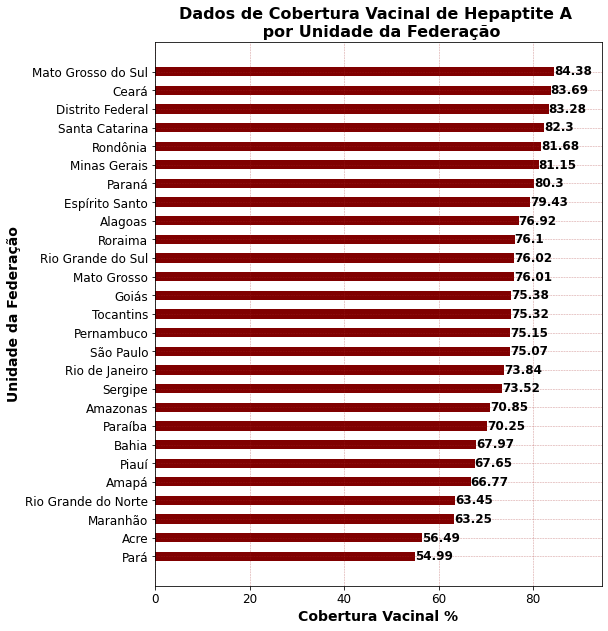

In [75]:
#ordenando os dados pelo total
dados_vacina_hep_A = dados_vacina_hep_A.sort_values('Total', ascending = True)

#criando a vizualização dos dados totais de cobertura vacinal de hepatite A
plt.figure(figsize=(8,10))
ax = plt.barh(dados_vacina_hep_A.index, dados_vacina_hep_A["Total"], height = 0.5, color = "maroon")

plt.title("Dados de Cobertura Vacinal de Hepaptite A \n por Unidade da Federação", fontsize = 16, fontweight = "bold") #título
plt.xlabel("Cobertura Vacinal %",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='brown', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.xlim(0,dados_vacina_hep_A["Total"].max()*1.12) #aumentando o limite do eixo x para caber o valor de cada barra sem sobrepor o eixo

#rotina para adicionar o número em frente cada barra
for index, value in enumerate(dados_vacina_hep_A["Total"].round(2)):
  plt.text(value, index, str(value), color='black', fontweight="bold", fontsize=12, verticalalignment='center')

plt.show()

O gráfico mostra que todos as unidades federativas apresentam coberturas vacinais abaixo de 90%, como estados como Acre e Pará, apresentando taxas pouco maiores que 50%. 



In [76]:
#construindo um novo Dataframe sem a coluna "Total"
dados_vacina_hep_A_uso = dados_vacina_hep_A.drop("Total", axis=1) 

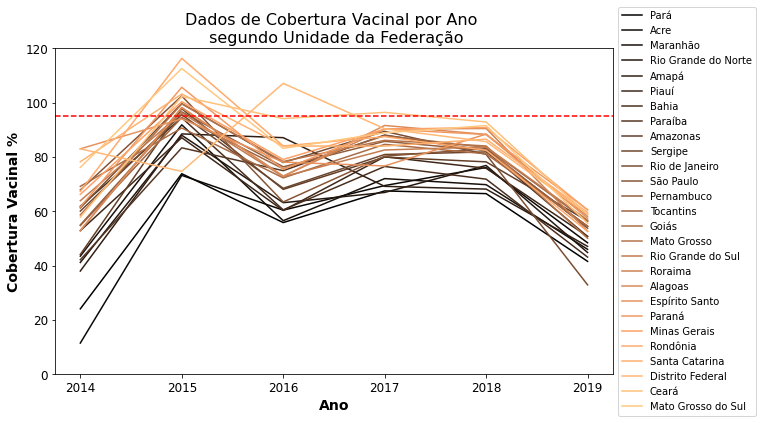

In [77]:
#visualizando os dados de cobertura vacinal segundo UF no período de 2014 a 2019
ax = dados_vacina_hep_A_uso[["2014", "2015", "2016", "2017", "2018", "2019"]].T.plot(figsize=(10,6), colormap = 'copper')

plt.title("Dados de Cobertura Vacinal por Ano \n segundo Unidade da Federação", fontsize = 16) #Título figura
plt.xlabel("Ano",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Cobertura Vacinal %",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.ylim(0,120) #definindo limites do eixo y
plt.axhline(95, linestyle="--", color='red') #construindo linha indicativa de taxa de 75%


plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #posicionando a legenda

plt.show()

Apesar das diferenças nas coberturas vacinais, o gráfico mostra que todas as UF's apresentaram o mesmo perfil no decorrer dos anos, mantendo as taxas de cobertura vacinal abaixo do recomendado desde 2016. Essa semelhança nos perfis levanta da hipótese de que os fatores que influenciaram no aumento ou redução da cobertura vacinal foi comum para todas as Unidades Federativas.

#### Cobertura Vacinal por Região

In [78]:
dados_vacina_hep_A.head()

,2014,2015,2016,2017,2018,2019,Total,Região
Unidade da Federação,,,,,,,,
Pará,24.11,73.83,55.85,67.50,66.50,41.59,54.99,Norte
Acre,11.52,73.22,60.42,69.47,76.11,48.41,56.49,Norte
Maranhão,43.49,91.82,56.54,72.03,69.80,46.01,63.25,Nordeste
Rio Grande do Norte,41.17,87.97,63.17,66.93,76.86,44.84,63.45,Nordeste
Amapá,38.02,88.47,87.09,69.18,68.17,47.09,66.77,Norte


In [79]:
# calculando o valor médio da cobertura vacinal por região
norte = dados_vacina_hep_A.query("Região == 'Norte'")["Total"].mean()
sul = dados_vacina_hep_A.query("Região == 'Sul'")["Total"].mean()
sudeste = dados_vacina_hep_A.query("Região == 'Sudeste'")["Total"].mean()
centro_oeste = dados_vacina_hep_A.query("Região == 'Centro-Oeste'")["Total"].mean()
nordeste = dados_vacina_hep_A.query("Região == 'Nordeste'")["Total"].mean()

In [80]:
# criando um dicionário para associar região e cobertura vacinal
dados_cv_hep_A_regiao = {'Região': ["Norte", "Sul", "Sudeste", "Centro-Oeste", "Nordeste"], 'Cobertura Vacinal': [norte, sul, sudeste, centro_oeste, nordeste]}

In [81]:
# Criando um novo DataFrame com a região e a cobertura vacinal
dados_cv_por_regiao = pd.DataFrame(data=dados_cv_hep_A_regiao)
dados_cv_por_regiao = dados_cv_por_regiao.sort_values('Cobertura Vacinal', ascending = False)
dados_cv_por_regiao

,Região,Cobertura Vacinal
3,Centro-Oeste,79.76
1,Sul,79.54
2,Sudeste,77.37
4,Nordeste,71.32
0,Norte,68.89


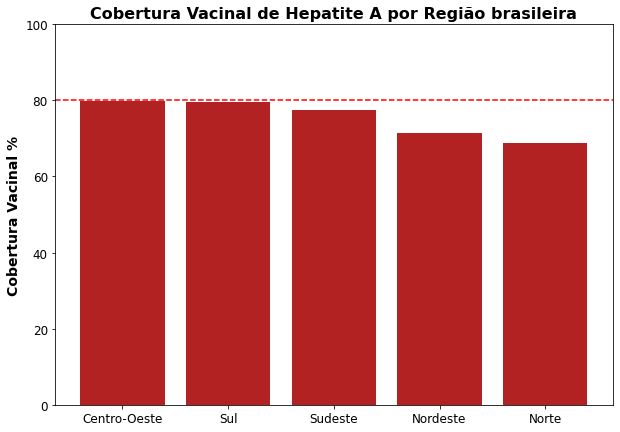

In [82]:
#criando a vizualização dos dados totais de cobertura vacinal de hepatite A por Região

plt.figure(figsize=(10, 7))
ax = plt.bar(dados_cv_por_regiao["Região"], dados_cv_por_regiao["Cobertura Vacinal"], color = "firebrick")

plt.title("Cobertura Vacinal de Hepatite A por Região brasileira", fontsize = 16, fontweight = "bold") #título
#plt.xlabel("Região",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Cobertura Vacinal %",fontsize = 14, fontweight = "bold") #título eixo y

plt.axhline(80, linestyle="--", color='red') #construindo linha indicativa de taxa de 95%
plt.ylim(0, 100)

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.show()

#### Observações:
O gráfico mostra que em termos gerais Centro-oeste e Sul são as região com maior cobetura vacinal e, ainda assim, com taxa de pouco abaixo de 80%. A região Norte é a que apresenta menor taxa.

### Número de casos de hepatite A

In [83]:
#Importando o banco de dados de número de casos de hepatite A  por ano segundo unidade da Federação
dados_casos_hep_A = pd.read_excel('/content/drive/MyDrive/Bootcamp Data Science/Módulo 2/Projeto 2/dados_compilados_casos_hepatite_a.xlsx')
dados_casos_hep_A.head()

,Unidade da Federação,Total,1999-2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Acre,4583,2306,224,111,74,108,402,641,304,190,96,62,39,14,12
1,Alagoas,4024,1855,233,390,292,230,337,148,203,143,109,45,25,8,6
2,Amapá,4264,2210,121,171,168,252,340,224,91,376,210,44,37,17,3
3,Amazonas,14245,7751,519,780,956,708,795,521,660,940,402,69,56,59,29
4,Bahia,9263,5022,764,593,848,411,316,191,345,476,128,60,55,40,14


In [84]:
#Transformando a coluna 'Unidade da Federação' em indice
dados_casos_hep_A = dados_casos_hep_A.set_index("Unidade da Federação")
dados_casos_hep_A.head()

,Total,1999-2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,
Acre,4583,2306,224,111,74,108,402,641,304,190,96,62,39,14,12
Alagoas,4024,1855,233,390,292,230,337,148,203,143,109,45,25,8,6
Amapá,4264,2210,121,171,168,252,340,224,91,376,210,44,37,17,3
Amazonas,14245,7751,519,780,956,708,795,521,660,940,402,69,56,59,29
Bahia,9263,5022,764,593,848,411,316,191,345,476,128,60,55,40,14


In [85]:
#criando novo dataset sem as colunas 'Total' e '1999-2006'
dados_casos_hep_A_uso = dados_casos_hep_A.drop("Total", axis=1)
dados_casos_hep_A_uso = dados_casos_hep_A_uso.drop("1999-2006", axis=1)
dados_casos_hep_A_uso.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,
Acre,224,111,74,108,402,641,304,190,96,62,39,14,12
Alagoas,233,390,292,230,337,148,203,143,109,45,25,8,6
Amapá,121,171,168,252,340,224,91,376,210,44,37,17,3
Amazonas,519,780,956,708,795,521,660,940,402,69,56,59,29
Bahia,764,593,848,411,316,191,345,476,128,60,55,40,14


In [86]:
#Ordenando os dados pela em ordem alfabetica pela unidade da federação
dados_casos_hep_A_uso = dados_casos_hep_A_uso.sort_values('Unidade da Federação', ascending = True)
dados_casos_hep_A_uso.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,
Acre,224,111,74,108,402,641,304,190,96,62,39,14,12
Alagoas,233,390,292,230,337,148,203,143,109,45,25,8,6
Amapá,121,171,168,252,340,224,91,376,210,44,37,17,3
Amazonas,519,780,956,708,795,521,660,940,402,69,56,59,29
Bahia,764,593,848,411,316,191,345,476,128,60,55,40,14


In [87]:
#criando nova coluna com a Região a que cada estado pertence
dados_casos_hep_A_uso['Região'] = dados_vacina_hep_A["Região"]
dados_casos_hep_A_uso.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Região
Unidade da Federação,,,,,,,,,,,,,,
Acre,224,111,74,108,402,641,304,190,96,62,39,14,12,Norte
Alagoas,233,390,292,230,337,148,203,143,109,45,25,8,6,Nordeste
Amapá,121,171,168,252,340,224,91,376,210,44,37,17,3,Norte
Amazonas,519,780,956,708,795,521,660,940,402,69,56,59,29,Norte
Bahia,764,593,848,411,316,191,345,476,128,60,55,40,14,Nordeste


In [88]:
#selecionando apenas os dados de 2014 a 2019
dados_casos_hep_A_uso_selc = dados_casos_hep_A_uso[[2014, 2015, 2016, 2017, 2018, 2019, "Região"]]
dados_casos_hep_A_uso_selc.head()

,2014,2015,2016,2017,2018,2019,Região
Unidade da Federação,,,,,,,
Acre,190,96,62,39,14,12,Norte
Alagoas,143,109,45,25,8,6,Nordeste
Amapá,376,210,44,37,17,3,Norte
Amazonas,940,402,69,56,59,29,Norte
Bahia,476,128,60,55,40,14,Nordeste


In [89]:
#criando uma nova coluna Total
dados_casos_hep_A_uso_selc["Total"] = dados_casos_hep_A_uso_selc[[2014, 2015, 2016, 2017, 2018, 2019]].sum(1)
dados_casos_hep_A_uso_selc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2014,2015,2016,2017,2018,2019,Região,Total
Unidade da Federação,,,,,,,,
Acre,190,96,62,39,14,12,Norte,413
Alagoas,143,109,45,25,8,6,Nordeste,336
Amapá,376,210,44,37,17,3,Norte,687
Amazonas,940,402,69,56,59,29,Norte,1555
Bahia,476,128,60,55,40,14,Nordeste,773


#### Proporção por cem mil habitantes

In [90]:
dados_casos_hep_A_uso_selc.index

Index(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype='object', name='Unidade da Federação')

In [91]:
# criando uma lista com a população de cada UF
UF_habitantes = [4064052, 2318822, 3534165, 3055149, 3281480, 2809394, 7113540, 9187103, 1796460, 631181, 3351543, 7252502, 4039277, 11516840, 894470, 7114598, 11422973, 3526220, 1590248, 9616621, 861773, 21292666, 14930634, 8690745, 17366189, 4207714, 46289333]

In [92]:
# criando uma nova coluna com o número de habitantes de cada UF
dados_casos_hep_A_uso_selc['Habitantes'] = UF_habitantes
dados_casos_hep_A_uso_selc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2014,2015,2016,2017,2018,2019,Região,Total,Habitantes
Unidade da Federação,,,,,,,,,
Acre,190,96,62,39,14,12,Norte,413,4064052
Alagoas,143,109,45,25,8,6,Nordeste,336,2318822
Amapá,376,210,44,37,17,3,Norte,687,3534165
Amazonas,940,402,69,56,59,29,Norte,1555,3055149
Bahia,476,128,60,55,40,14,Nordeste,773,3281480


In [93]:
#transformando os números de caso de hepatite A em nº de casos por milhão de habitantes.
casos_por_milhao = (dados_casos_hep_A_uso_selc["Total"] * 100000) / dados_casos_hep_A_uso_selc["Habitantes"]

In [94]:
#criando uma nova coluna com o n° de casos por milhão
dados_casos_hep_A_uso_selc["Casos por cem mil habitantes"] = casos_por_milhao
dados_casos_hep_A_uso_selc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2014,2015,2016,2017,2018,2019,Região,Total,Habitantes,Casos por cem mil habitantes
Unidade da Federação,,,,,,,,,,
Acre,190,96,62,39,14,12,Norte,413,4064052,10.16
Alagoas,143,109,45,25,8,6,Nordeste,336,2318822,14.49
Amapá,376,210,44,37,17,3,Norte,687,3534165,19.44
Amazonas,940,402,69,56,59,29,Norte,1555,3055149,50.90
Bahia,476,128,60,55,40,14,Nordeste,773,3281480,23.56


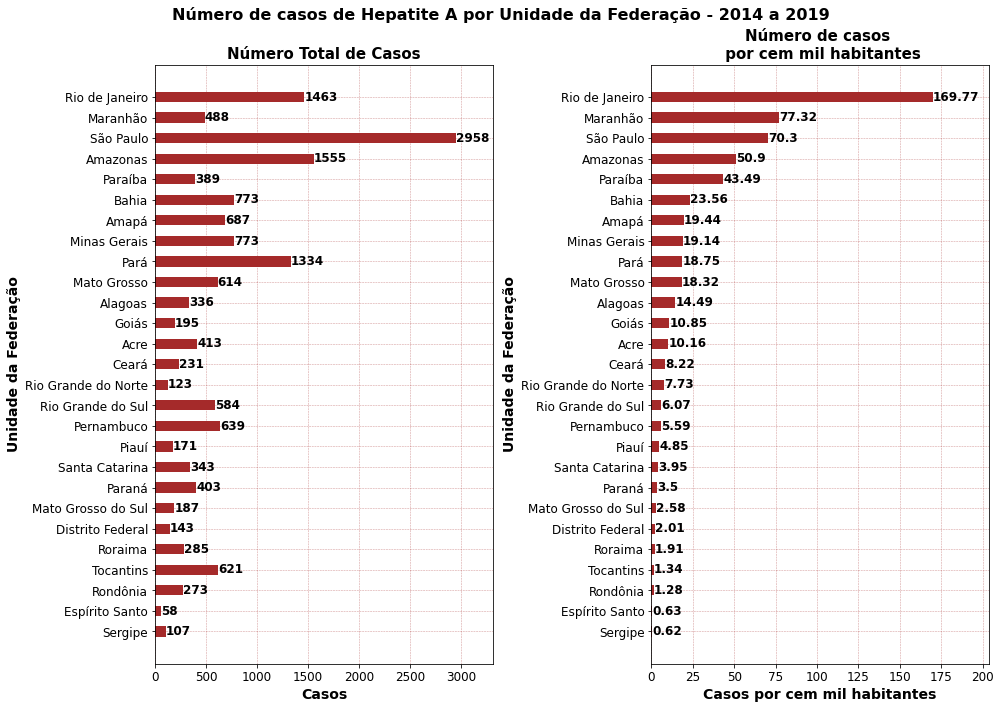

In [95]:
#ordenando os dados pelo total
dados_casos_hep_A_uso_selc = dados_casos_hep_A_uso_selc.sort_values('Casos por cem mil habitantes', ascending = True)

#CriANdo a figura
plt.figure(figsize=(14,10))
plt.suptitle("Número de casos de Hepatite A por Unidade da Federação - 2014 a 2019", fontsize = 16, fontweight = "bold")

#Gráfico 1 - número total de casos
#criando a vizualização dos dados de número de casos total
ax = plt.subplot(1,2,1)
plt.barh(dados_casos_hep_A_uso_selc.index, dados_casos_hep_A_uso_selc["Total"], height = 0.5, color = "brown")

plt.title("Número Total de Casos", fontsize = 15, fontweight = "bold") #título
plt.xlabel("Casos",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='brown', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.xlim(0,dados_casos_hep_A_uso_selc["Total"].max()*1.12) #aumentando o limite do eixo x para caber o valor de cada barra sem sobrepor o eixo

#rotina para adicionar o número em frente cada barra
for index, value in enumerate(dados_casos_hep_A_uso_selc["Total"].round(2)):
  plt.text(value, index, str(value), color='black', fontweight="bold", fontsize=12, verticalalignment='center')


#ordenando os dados pelo total
dados_casos_hep_A_uso_selc = dados_casos_hep_A_uso_selc.sort_values('Casos por cem mil habitantes', ascending = True)

#Gráfico 2 - número de casos proporcional ao número de habitantes
#criando a vizualização dos dados de número de casos por cem mil habitantes
ax = plt.subplot(1,2,2)
plt.barh(dados_casos_hep_A_uso_selc.index, dados_casos_hep_A_uso_selc["Casos por cem mil habitantes"], height = 0.5, color = "brown")

plt.title("Número de casos \n por cem mil habitantes", fontsize = 15, fontweight = "bold") #título
plt.xlabel("Casos por cem mil habitantes",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='brown', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.xlim(0,dados_casos_hep_A_uso_selc["Casos por cem mil habitantes"].max()*1.2) #aumentando o limite do eixo x para caber o valor de cada barra sem sobrepor o eixo

#rotina para adicionar o número em frente cada barra
for index, value in enumerate(dados_casos_hep_A_uso_selc["Casos por cem mil habitantes"].round(2)):
  plt.text(value, index, str(value), color='black', fontweight="bold", fontsize=12, verticalalignment='center')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

#### Observações

O segundo gráfico apresenta os dados de número de casos proporcionais ao número de habitantes. Essa relação de proporcionalidade nos permite visualizar de forma mais precisa as UF's que apresentam maior número de casos, destacando então Rio de Janeiro, Maranhão e São Paulo.

Esses dados serão importantes para avaliarmos a incidência de casos em cada região.

#### Número de casos por região

In [96]:
# calculando número de casos total por região - 2014 a 2019
norte1 = dados_casos_hep_A_uso_selc.query("Região == 'Norte'")["Casos por cem mil habitantes"].sum()
sul1 = dados_casos_hep_A_uso_selc.query("Região == 'Sul'")["Casos por cem mil habitantes"].sum()
sudeste1 = dados_casos_hep_A_uso_selc.query("Região == 'Sudeste'")["Casos por cem mil habitantes"].sum()
centro_oeste1 = dados_casos_hep_A_uso_selc.query("Região == 'Centro-Oeste'")["Casos por cem mil habitantes"].sum()
nordeste1 = dados_casos_hep_A_uso_selc.query("Região == 'Nordeste'")["Casos por cem mil habitantes"].sum()

In [97]:
# criando um dicionário para associar região e cobertura vacinal
dados_casos_hep_A_regiao = {'Região': ["Norte", "Sul", "Sudeste", "Centro-Oeste", "Nordeste"], 'Casos por cem mil habitantes': [norte1, sul1, sudeste1, centro_oeste1, nordeste1]}

In [98]:
#ordenando os dados pelo 'casos por milhão de habitantes'
dados_casos_hep_A_uso_selc = dados_casos_hep_A_uso_selc.sort_values('Casos por cem mil habitantes', ascending = False)
dados_casos_hep_A_uso_selc.head()

,2014,2015,2016,2017,2018,2019,Região,Total,Habitantes,Casos por cem mil habitantes
Unidade da Federação,,,,,,,,,,
Rio de Janeiro,438,193,41,183,509,99,Sudeste,1463,861773,169.77
Maranhão,248,128,43,24,23,22,Nordeste,488,631181,77.32
São Paulo,327,241,155,1121,823,291,Sudeste,2958,4207714,70.30
Amazonas,940,402,69,56,59,29,Norte,1555,3055149,50.90
Paraíba,295,61,4,18,6,5,Nordeste,389,894470,43.49


In [99]:
# Criando um novo DataFrame com a região e a cobertura vacinal
dados_casos_por_regiao = pd.DataFrame(data=dados_casos_hep_A_regiao)
dados_casos_por_regiao = dados_casos_por_regiao.sort_values('Casos por cem mil habitantes', ascending = False)
dados_casos_por_regiao

,Região,Casos por cem mil habitantes
2,Sudeste,259.83
4,Nordeste,185.87
0,Norte,103.78
3,Centro-Oeste,33.76
1,Sul,13.52


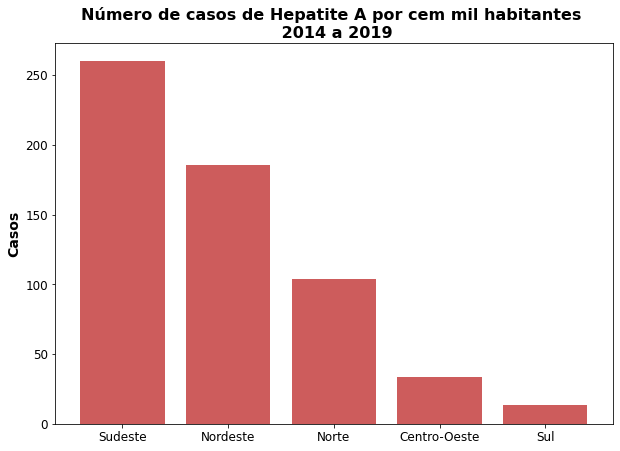

In [100]:
#criando a vizualização do número de casos de hepatite A por Região no período de 2014 a 2019

plt.figure(figsize=(10, 7))
ax = plt.bar(dados_casos_por_regiao["Região"], dados_casos_por_regiao["Casos por cem mil habitantes"], color = "indianred")

plt.title("Número de casos de Hepatite A por cem mil habitantes \n 2014 a 2019", fontsize = 16, fontweight = "bold") #título
#plt.xlabel("Região",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Casos",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.show()

#### Observações:
O gráfico mostra que o Centro-oeste e Sul são as regiões com menor número de casos total. Esse dado parece coerente quando comparado com os dados de cobertura vacinal em que as mesmas regiões apresentam maior cobertura.

O Sudeste se destaca como a região com maior número de casos. Sendo assim, é interessante avaliarmos a progressão do número de casos no decorrer dos anos. 

##### Região Sudeste

In [101]:
#selecionando apenas os dados da região sudeste
dados_sudeste = dados_casos_hep_A_uso_selc.query("Região == 'Sudeste'")

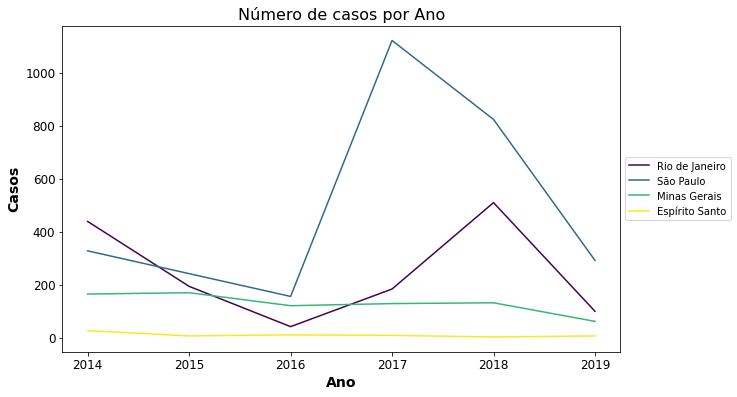

In [102]:
#gerando a visualização dos dados de número de casos de hepatite A da região Sudeste
ax = dados_sudeste[[2014, 2015, 2016, 2017, 2018, 2019]].T.plot(figsize=(10,6), colormap = 'viridis')

plt.title("Número de casos por Ano", fontsize = 16) #Título figura
plt.xlabel("Ano",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Casos",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

##### Observações

Quando observamos apenas os dados dos estados da região Sudeste, observamos que houve um aumento considerável no número de casos de hepatite A nos estados de São Paulo e Rio de Janeiro em 2017 e 2018, motivo pelo qual a região se destaca no número de casos no Brasil[6].

A Secretaria Municipal de Saúde de São Paulo atribuiu o aumento dos casos ao sexo oral-anal sem proteção — embora a hepatite A não seja considerada uma infecção sexualmente transmissível, o contato com a região perianal ou com material que contenha resíduos de fezes pode gerar contaminação[6, 7]. 

No Rio de Janeiro, gestores da saúde, indicaram como causa mais provável a presença do vírus na água, principalmente pela ocorrência em uma região pobre com deficiência no saneamento básico. O laboratório da FioCruz analisou a água em 10 pontos na região do Vidigal e identificou presença do vírus em três locais, levantando o alerta para a população manter cuidados preventivos[7].

##### Região Nordeste

In [103]:
#selecionando apenas os dados da região nordeste
dados_nordeste = dados_casos_hep_A_uso_selc.query("Região == 'Nordeste'")

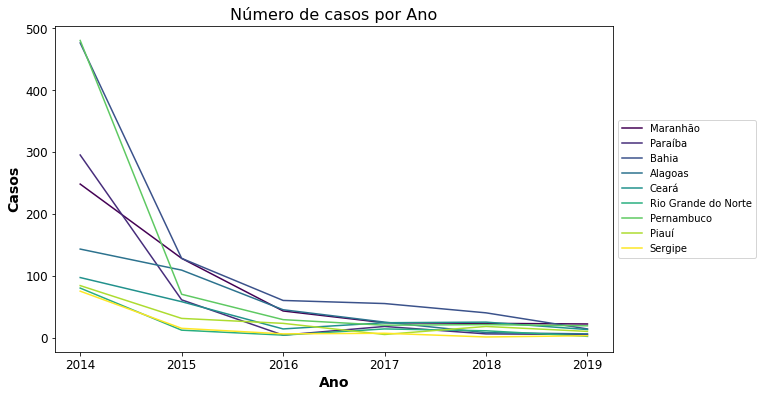

In [104]:
#gerando a visualização dos dados de número de casos de hepatite A da região Nordeste
ax = dados_nordeste[[2014, 2015, 2016, 2017, 2018, 2019]].T.plot(figsize=(10,6), colormap = 'viridis', )

plt.title("Número de casos por Ano", fontsize = 16) #Título figura
plt.xlabel("Ano",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Casos",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

##### Observações:
O Nordeste é a segunda região em maior número de casos e a segunda com menor taxa de cobertura vacinal.

### Nº de Casos x Cobertura vacinal

In [105]:
#ordenando os dados de cobertura vacinal pela 'Região'
dados_cv_por_regiao = dados_cv_por_regiao.sort_values('Região', ascending = True)
dados_cv_por_regiao

,Região,Cobertura Vacinal
3,Centro-Oeste,79.76
4,Nordeste,71.32
0,Norte,68.89
2,Sudeste,77.37
1,Sul,79.54


In [106]:
#ordenando os dados de nº de casos pela 'Região'
dados_casos_por_regiao = dados_casos_por_regiao.sort_values('Região', ascending = True)
dados_casos_por_regiao

,Região,Casos por cem mil habitantes
3,Centro-Oeste,33.76
4,Nordeste,185.87
0,Norte,103.78
2,Sudeste,259.83
1,Sul,13.52


In [107]:
#criando novo dataset com o nº de casos e a cobertura vacinal por região
dados_cv_casos = dados_cv_por_regiao
dados_cv_casos

,Região,Cobertura Vacinal
3,Centro-Oeste,79.76
4,Nordeste,71.32
0,Norte,68.89
2,Sudeste,77.37
1,Sul,79.54


In [108]:
#criando a coluna de 'Casos por cel mil habitantes'
dados_cv_casos['Casos por cem mil habitantes'] = dados_casos_por_regiao["Casos por cem mil habitantes"]
dados_cv_casos

,Região,Cobertura Vacinal,Casos por cem mil habitantes
3,Centro-Oeste,79.76,33.76
4,Nordeste,71.32,185.87
0,Norte,68.89,103.78
2,Sudeste,77.37,259.83
1,Sul,79.54,13.52


In [109]:
#ordenando os dados pelos valores de nº de casos
dados_cv_casos.sort_values('Casos por cem mil habitantes', ascending = False)

,Região,Cobertura Vacinal,Casos por cem mil habitantes
2,Sudeste,77.37,259.83
4,Nordeste,71.32,185.87
0,Norte,68.89,103.78
3,Centro-Oeste,79.76,33.76
1,Sul,79.54,13.52


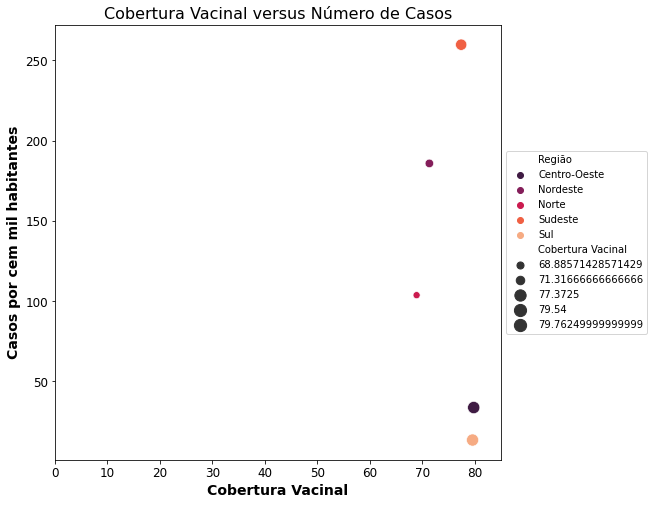

In [110]:
#vizualizando os dados de cobertura vacinal versus número de casos
plt.figure(figsize=(8,8))
sns.scatterplot(data=dados_cv_casos, x="Cobertura Vacinal", y="Casos por cem mil habitantes", 
                hue = "Região", size="Cobertura Vacinal", sizes=(50, 150), palette="rocket")

plt.title("Cobertura Vacinal versus Número de Casos", fontsize = 16) #Título figura
plt.xlabel("Cobertura Vacinal",fontsize = 14, fontweight = "bold") #título eixo x
plt.ylabel("Casos por cem mil habitantes",fontsize = 14, fontweight = "bold") #título eixo y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlim(0,85)

plt.show()

### Observações e Conclusões

O grafico mostra que apesar de haver uma certa relação entre cobertura vacinal e número de casos, ela não segue uma proporcionalidade. Como visto anteriormente, a região sudeste apesar de alta taxa de cobertura vacinal apresentou altos números de casos devido a problemas de saúde sexual e saneamento.

Nas regiões Centro-oeste e Sul, a cobertura vacinal, apesar de abaixo do recomendado, tem se mostrado eficiente no controle da doença. Sendo assim, o número de casos nessas regiões é baixo.

Na região Nordeste, o número de casos é alto, apesar de ter uma taxa de cobertura vacinal semelhante a da região centro-oeste. Esse dado indica que existem fatores que colaboram para o aumento do número de casos e um destes pode ser a distribuição desigual de imunos pelo país [7
].

Em todos os casos, as baixas taxas de cobertura vacinal estão associadas a diversos fatores como a falsa sensação de segurança contra doenças que diminuíram sua incidência, a distribuição desigual de imunos pelo país e as falhas de comunicação dos órgãos de saúde com a população. A crise do Sistema Único de Saúde (SUS) também tem sido apontado como um dos fatores.



---





## Referências

[1] Revista Radis aborda queda da cobertura vacinal no Brasil. Disponível em: <https://portal.fiocruz.br/noticia/revista-radis-aborda-queda-da-cobertura-vacinal-no-brasil> Acesso em: 13/01/2021

[2]Em queda há 5 anos, coberturas vacinais preocupam Ministério da Saúde. Disponível em: <https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/em-queda-ha-5-anos-coberturas-vacinais-preocupam-ministerio-da-saude#:~:text=Para%20ambas%2C%20a%20meta%20%C3%A9,%2C%20a%2068%2C46%25> Acesso em: 13/02/2021.

[3] SUS passa a oferecer vacina contra hepatite A para crianças. Disponível em: <http://www.blog.saude.gov.br/index.php/570-destaques/34211-sus-passa-a-oferecer-vacina-contra-hepatite-a-para-criancas> Acesso em:10/02/2021

[4] Capital tem aumento de 960% de casos de Hepatite A. Disponível em: <https://g1.globo.com/sp/sao-paulo/noticia/capital-tem-aumento-de-960-de-casos-de-hepatite-a.ghtml> Acesso em: 19/02/2021

[5] Casos de hepatite A crescem 73% no Brasil puxados por alta em SP. Disponível em: <https://g1.globo.com/bemestar/noticia/casos-de-hepatite-a-crescem-73-no-brasil-puxados-por-alta-em-sp.ghtml> Acesso em: 19/02/2021

[6] Novos surtos em São Paulo e no Rio revertem uma década de queda nos casos de hepatite A. Disponível em: <https://www.bbc.com/portuguese/geral-42629636#:~:text=Em%202017%2C%20somente%20a%20cidade,anterior%2C%20houve%20apenas%20dez%20registros> Acesso em: 19/02/2021.

[7] Hepatite A: Crescem os riscos de contaminação. Disponível em: <https://radis.ensp.fiocruz.br/index.php/home/noticias/hepatite-a-crescem-os-riscos-de-contaminacao> Acesso em: 19/02/2021




